In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
nike = yf.download("NKE", start="2020-01-01", end="2025-07-01")

print(nike.head())

C:\Users\GAURAV SINGH\AppData\Local\Temp\ipykernel_7500\2791104943.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nike = yf.download("NKE", start="2020-01-01", end="2025-07-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            NKE        NKE        NKE        NKE      NKE
Date                                                           
2020-01-02  95.368217  95.377551  94.267097  94.584372  5644100
2020-01-03  95.106918  95.181572  93.604542  93.865824  4541800
2020-01-06  95.022942  95.032268  94.127116  94.201763  4612400
2020-01-07  94.976288  95.872114  94.071129  95.004281  6719900
2020-01-08  94.761665  95.312222  94.108454  94.537704  4942200


In [2]:
ts = nike['Close']
ts.index = pd.to_datetime(nike.index)
ts = ts.asfreq('B')  

In [3]:
ts=ts.fillna(method='ffill')


C:\Users\GAURAV SINGH\AppData\Local\Temp\ipykernel_7500\2332233030.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts=ts.fillna(method='ffill')


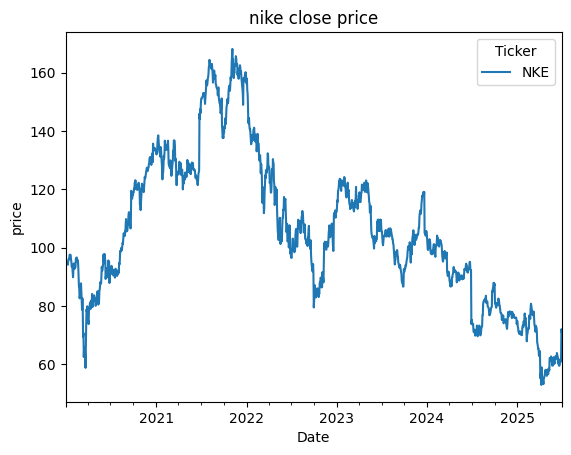

In [4]:
ts.plot(title="nike close price", )
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

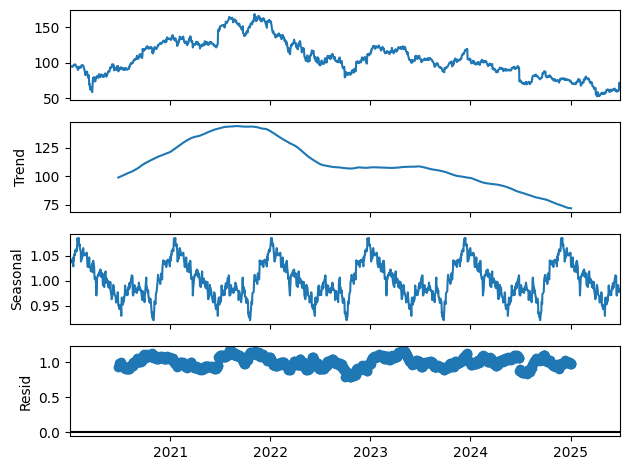

In [9]:
decomposition=seasonal_decompose(ts, model='multplicative', period=252)
decomposition.plot()
plt.tight_layout()
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(ts)
print("ADF statistic:", result[0])
print("p-value:", result[1])





ADF statistic: -1.3656415942929854
p-value: 0.59863268837183


In [7]:
ts_diff= ts.diff().dropna()
from statsmodels.tsa.stattools import adfuller
result=adfuller(ts_diff)
print("ADF statistic:", result[0])
print("p-value:", result[1])


ADF statistic: -38.378482373025925
p-value: 0.0


                               SARIMAX Results                                
Dep. Variable:                    NKE   No. Observations:                 1433
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3156.966
Date:                Tue, 22 Jul 2025   AIC                           6319.932
Time:                        23:06:01   BIC                           6335.733
Sample:                    01-02-2020   HQIC                          6325.832
                         - 06-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2327      1.485     -0.157      0.876      -3.144       2.678
ma.L1          0.2176      1.493      0.146      0.884      -2.708       3.143
sigma2         4.8131      0.069     69.397      0.0

<Axes: title={'center': '30-Day Forecast'}>

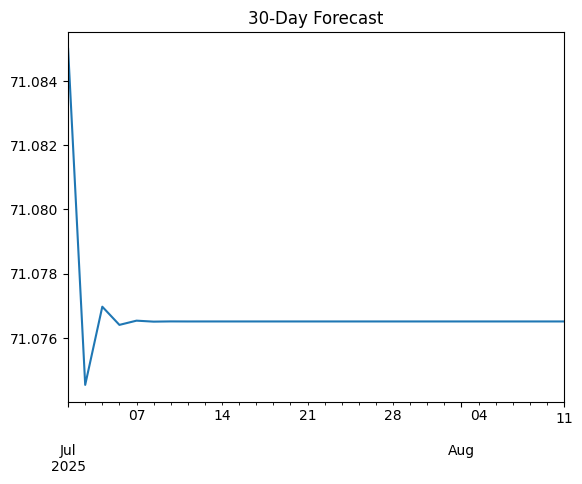

In [8]:

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(ts, order=(1, 1, 1))  # d=1 because you did first differencing
fit = model.fit()
print(fit.summary())

# Forecast
forecast = fit.forecast(steps=30)
forecast.plot(title="30-Day Forecast")
